In [1532]:
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Classification

In [1533]:
# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df


In [1534]:
my_df = generateCarTypeData(gnPoints=40)
#my_df

A scatter plot of data points

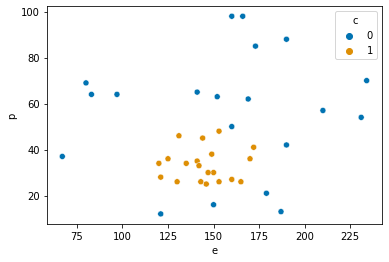

In [1535]:
#plt.scatter(my_df.e, my_df.p, marker='o');
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

In [1536]:
# get the min price of a family car from the data set my_df
my_df[my_df['c']==1]['p'].min()

25

In [1537]:
# get the max price of a NON-family car that is smaller than minimum price of a family car
min_price = my_df[my_df['c']==1]['p'].min()
my_df[(my_df['c']==0) & (my_df['p'] < min_price)]['p'].max()

21

$\color{red}{\text{Hint:}}$ Implement a function that returns min/max price/engine power values that define a rectangle classifier

In [1538]:
# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine
    

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define the LARGEST rectangle classifier

In [1539]:
def getRange_familyCar_large(gdf):
    min_price = 0
    max_price = 0
    min_engine = 0
    max_engine = 0
    
    min_price = my_df[my_df['c']==1]['p'].min()
    my_df[(my_df['c']==0) & (my_df['p'] < min_price)]['p'].max()
    
    max_price = my_df[my_df['c']==1]['p'].max()
    my_df[(my_df['c']==0) & (my_df['p'] > max_price)]['p'].max()
    
    min_engine = my_df[my_df['c']==1]['e'].min()
    my_df[(my_df['c']==0) & (my_df['e'] < min_engine)]['e'].max()
    
    max_engine = my_df[my_df['c']==1]['e'].max()
    my_df[(my_df['c']==0) & (my_df['e'] > max_engine)]['e'].max()
    
    
    return min_price, max_price, min_engine, max_engine

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define a medium (between smallest and largest) rectangle classifier

In [1540]:
def getRange_familyCar_medium(gdf):
    min_price = 0
    max_price = 0
    min_engine = 0
    max_engine = 0
    
    min_p_s, max_p_s, min_e_s, max_e_s = getRange_familyCar(gdf)
    min_p_l, max_p_l, min_e_l, max_e_l = getRange_familyCar_large(gdf)
    
    min_price = (min_p_s + min_p_l) /2
    max_price = (max_p_s + max_p_l) /2
    min_engine = (min_e_s + min_e_l) /2
    max_engine = (max_e_s + max_e_l) /2
    
    return min_price, max_price, min_engine, max_engine

In [1541]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 25 48 120 172
rectangle 25 48 120 172
rectangle 25.0 48.0 120.0 172.0


In [1542]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

In [1543]:
# first row of the data set
my_df.iloc[0]

e    150
p     30
c      1
Name: 0, dtype: int64

In [1544]:
classify_instance_byRectangle(25, 46, 120, 179, my_df.iloc[0])

1

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a circle classifier (obtained through data points that encapsulate family cars in the data set)

In [1545]:
def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):

    r = (max_price - min_price) / 2
    
    center_price = (max_price + min_price) / 2
    center_engine = (max_engine + min_engine) / 2

    if((gdf_instance.p - center_price)**2 + (gdf_instance.e - center_engine)**2 == r**2).all():
        return 1
    else:
        return 0

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a ellipsoid classifier (obtained through data points that encapsulate family cars in the data set)

In [1546]:
def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    
    if True:
        return 1
    else:
        return 0

In [1547]:
test_df = generateCarTypeData(gnPoints=20) # you might want to try different test set sizes

In [1548]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25 48 120 172
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
d_accuracy 0.8


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_large() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [1549]:
min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25 48 120 172
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
d_accuracy 0.8


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [1550]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25.0 48.0 120.0 172.0
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
d_accuracy 0.8


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byCircle() function is used for classifying the instances in the test set

In [1551]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byCircle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25.0 48.0 120.0 172.0
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
d_accuracy 0.5


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byEllipsoid() function is used for classifying the instances in the test set

### Regression

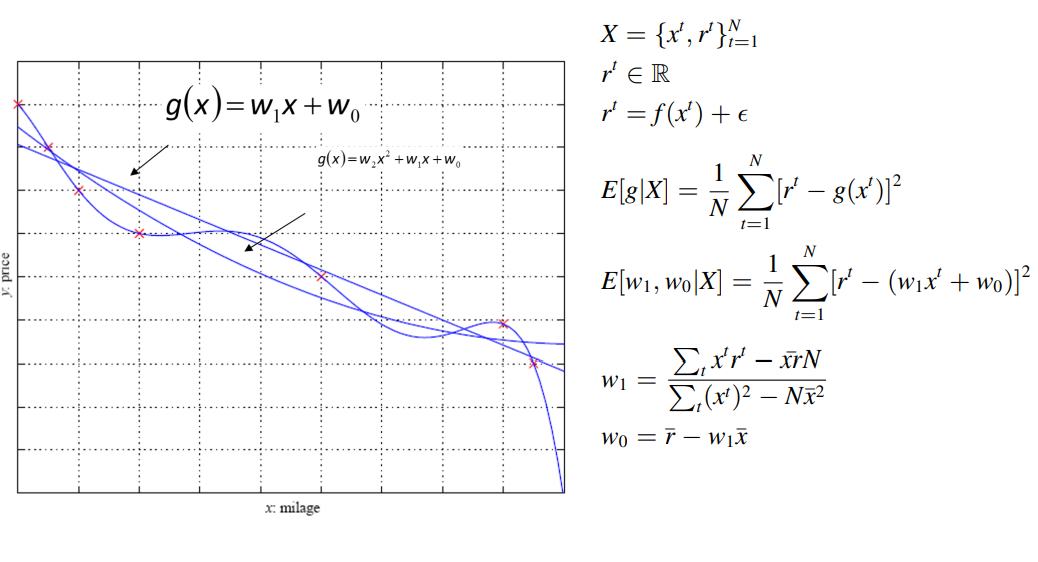

$\color{red}{\text{Question:}}$ Given a set of actual labels (gLabels) and predicted labels (gPredictedLabels), implement a function that returns RMSE

In [1552]:
def getRMSE(glabels, gPredictedLabels):
    RMSE = 0
    MSE = np.square(glabels - gPredictedLabels).mean()
    RMSE = math.sqrt(MSE)
    return RMSE

A function that generates data points according to the equation (r = mx + b + noise) where m=2.25, b = 6, and noise$\sim N(0,1.21)$

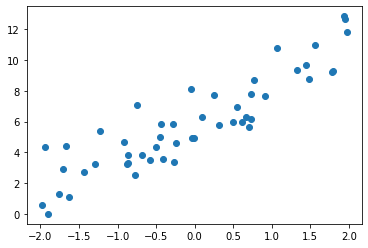

In [1553]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    #rnd_num = random.random()
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))
    #r.append(b + m *rnd_num)

plt.scatter(X, r, marker='o');

$\color{red}{\text{Question:}}$ Calculate $w_0$ and $w_1$ values in linear regression equation $r = w_0+w_1*x$ based on the closed form expressions in the lecture notes.

In [1554]:
def cal_coefficents(x,r,n):
  sigma_num = 0
  sigma_deno = 0
  for i in range(n):
      sigma_num = sigma_num + x[i]*r[i]
      # num = sigma_num - np.mean(x[i])*r[i]*n
      sigma_deno = sigma_deno + x[i]**2
      # deno = sigma_deno - n * np.mean(x[i])**2
  num = sigma_num - np.mean(x)*np.mean(r)*n
  deno = sigma_deno - n * np.mean(x)**2
  w_1 = num/deno
  w_0 = np.mean(r) - w_1 * np.mean(x)
  return w_0, w_1


$\color{red}{\text{Question:}}$ Report the error with the calculated w_1 and w_0.

Hint: Use getRMSE() function that you have implemented

In [1555]:
# Report the error with the calculated w_1 and w_0
w_0, w_1 = cal_coefficents(X,r,n_points)

new_r = []

for i in X:
    new_r.append(w_0 + w_1*i)

print('w0:', w_0, 'w1:', w_1)
print('RMSE:', getRMSE(np.array(r), new_r))

w0: 6.01797946312696 w1: 2.3657629887422935
RMSE: 1.330311071922799


$\color{red}{\text{Question:}}$ Plot the data points along with the fitted line.

Hint: Use mathplotlib library's plot function

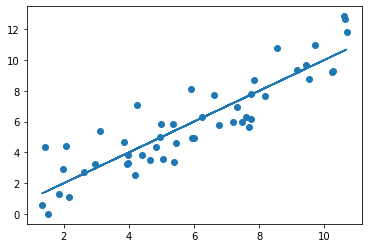

In [1556]:
# Plot the data points along with the fitted line
import matplotlib.pyplot as plt

x= []

for i in X:
    rnd_num = np.random.uniform(-2, 2)
    x.append(w_0 + w_1 * i)

x = np.array(x)
y = np.array(r)
 
a, b = np.polyfit(x, y, 1);
plt.scatter(x, y)
plt.plot(x, a*x+b)

using library functions for linear regression

In [1557]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

# sklearn linear regression function
model = LinearRegression()
model.fit(xx, rr)
r_pred = model.predict(xx)

# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

RMSE = getRMSE(rr, r_pred)
print("RMSE",RMSE)

# insert codes for plotting the fitted function

Intercept: 
 [6.01797946]
Coefficients: 
 [[2.36576299]]
RMSE 1.330311071922799


using library functions for polynomial regression

In [1558]:
import operator
from sklearn.preprocessing import PolynomialFeatures

def polyFit(gxx, grr, gnDegree):

    polynomial_features= PolynomialFeatures(degree=gnDegree)
    x_poly = polynomial_features.fit_transform(gxx)

    model = LinearRegression()
    model.fit(x_poly, grr)
    r_poly_pred = model.predict(x_poly)

    # The coefficients + Intercept
    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)
    
    #RMSE = getRMSE(gxx, grr, r_poly_pred)
    #print('RMSE',RMSE)

    plt.scatter(gxx, grr, s=10)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(gxx,r_poly_pred), key=sort_axis)
    gxx, r_poly_pred = zip(*sorted_zip)
    plt.plot(gxx, r_poly_pred, color='m')
    plt.show()
    
    return model.intercept_, model.coef_

Intercept: 
 [5.61625248]
Coefficients: 
 [[0.         2.36144474 0.303869  ]]


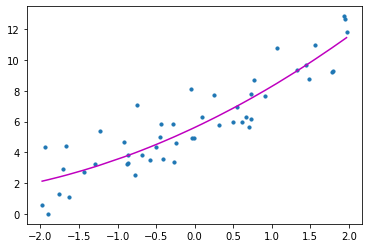

(array([5.61625248]), array([[0.        , 2.36144474, 0.303869  ]]))

In [1559]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

polyFit(xx, rr, gnDegree=2)

Intercept: 
 [5.59847814]
Coefficients: 
 [[0.         1.90680493 0.30657392 0.17218801]]


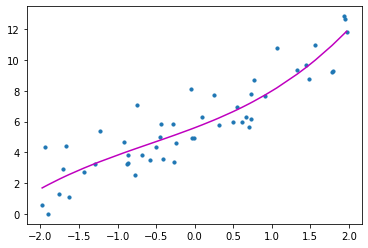

(array([5.59847814]),
 array([[0.        , 1.90680493, 0.30657392, 0.17218801]]))

In [1560]:
polyFit(xx, rr, gnDegree=3)

Intercept: 
 [5.41561954]
Coefficients: 
 [[ 0.          2.25252885  1.15226243 -0.26338285 -0.55851679  0.09632286
   0.09233648]]


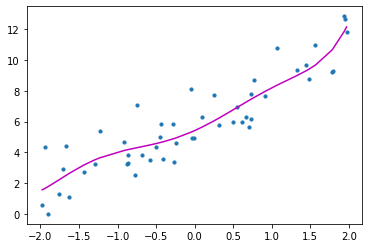

(array([5.41561954]),
 array([[ 0.        ,  2.25252885,  1.15226243, -0.26338285, -0.55851679,
          0.09632286,  0.09233648]]))

In [1561]:
polyFit(xx, rr, gnDegree=6)